In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Task - 2

1)Plot surfaces with dataset sizes (50, 200, 500) and model complexities (2,3,6) with different values of lambda.

2)Scatter plots with target output 𝑡𝑛 on x-axis and model output (𝒙𝑛 , 𝒘) on yaxis for the best performing model, for training data and test data

3)Tables showing the 𝐸𝑅𝑀𝑆 on the training data, the validation data and the test data, for different models




Index of Functions:

- get_feature_mat(x1,x2,deg): return mat 
- get_weights(feature,y): return mat
- get_regularised_weights(feature,y,lamb): return mat
- get_sample_data(df,size): return x1, x2, y
- linear_regress_poly_basis(x1,x2,y,deg): return w_star
- linear_regress_poly_basis_with_regu(x1,x2,y,deg,lamb): return w_star
- predict(x1, x2, w, deg): return y
- plot_predict_v_actual(weight,X1,X2,Y,deg): plots graph
- train_val_test_split(df): return train, val, test
- e_rms(weight, train, test, val, deg): return e_train, e_val, e_test

In [39]:
df = pd.read_csv('function0_2d.csv')
df.head()

,Unnamed: 0,x1,x2,y
0,0,-1.780329,1.833831,7.371565
1,1,-14.448144,13.645452,21.055938
2,2,-5.206188,11.865557,17.921304
3,3,5.885330,11.831869,17.770090
4,4,-4.949820,-12.690380,18.465143


In [40]:
df.describe()

,Unnamed: 0,x1,x2,y
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,-0.254923,0.189507,17.102267
std,577.494589,9.195691,9.181824,3.338352
min,0.000000,-15.998309,-15.985441,3.170340
25%,499.750000,-8.114449,-7.579640,15.794764
50%,999.500000,-0.523056,0.062459,18.179844
75%,1499.250000,7.454075,8.210805,19.444185
max,1999.000000,15.980312,15.995282,21.348342


Dataset has 2 input features - x1 and x2

and 1 output variable - y

x1 and x2 lies between (-16,16)

y lies between (3,22)

In [41]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'y'], dtype='object')

In [42]:
df = df.drop(columns=["Unnamed: 0"])

In [43]:
x1 = np.array(df.x1)
x2 = np.array(df.x2)
y = np.array(df.y)
print(x1)

[ -1.78032948 -14.44814428  -5.20618838 ... -11.19534009  15.9202973
   1.30476708]


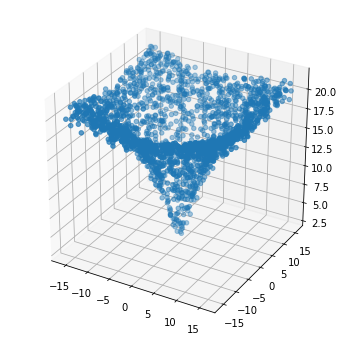

In [44]:
# %matplotlib notebook

fig= plt.figure(figsize = (6,6))

ax = fig.add_subplot(111, projection = '3d')

ax.xlabel = 'X1'
ax.yabel = 'X2'
ax.zlabel = 'Y'

ax.scatter(x1,x2,y)

In [45]:
def get_feature_mat(x1,x2,deg):
    
    d = deg
    
    mat = []
    
    for a,b in zip(x1,x2):
        
#         d = deg
        arr = [(a**i)*(b**(j)) for i in range(d+1) for j in range(d-i+1)]
        
        mat.append(arr)
        
    return mat 

In [46]:
def get_weights(feature,y):
    
    return np.dot(np.linalg.pinv(feature),y)

In [47]:
def get_regularised_weights(feature,y,lamb):
    
    fTf = np.dot(feature.T,feature)
    n = fTf.shape[0]
#     fTf /= n
    b = np.linalg.inv(fTf + lamb*np.identity(n))
    
    return np.dot(np.dot(b,feature.T),y)

In [48]:
def get_sample_data(df,size):
    
    sam = df.sample(n = size, random_state = 1)
    x1 = np.array(sam['x1'])
    x2 = np.array(sam['x2'])
    y = np.array(sam['y'])
    
    return x1, x2, y

In [49]:
def linear_regress_poly_basis(x1,x2,y,deg):
    
#     x,y = get_sample_data(df,sample_size)
    
    features = get_feature_mat(x1,x2,deg)
    
    w_star = get_weights(features,y)
    
    return w_star

In [50]:
def linear_regress_poly_basis_with_regu(x1,x2,y,deg,lamb):
    
    features = np.array(get_feature_mat(x1,x2,deg))
    
    w_star = get_regularised_weights(features,y,lamb)
    
    return w_star

In [51]:
def predict(x1, x2, w, deg):
    
    a,b = x1, x2
    d = deg
    f = [(a**i)*(b**(j)) for i in range(d+1) for j in range(d-i+1)]
    
    return np.dot(f,w)

In [52]:
def e_rms(weight, train, test, val, deg):
    
    x1_train, x2_train, y_train = map(np.array,[train.x1, train.x2, train.y])
    x1_val, x2_val, y_val = map(np.array,[val.x1, val.x2, val.y])
    x1_test, x2_test, y_test = map(np.array,[test.x1, test.x2, test.y])
    
    t_train =  np.array([predict(a,b,weight,deg) for a,b in zip(x1_train,x2_train)])
    t_val =  np.array([predict(a,b,weight,deg) for a,b in zip(x1_val,x2_val)])
    t_test =  np.array([predict(a,b,weight,deg) for a,b in zip(x1_test,x2_test)])
 
    e_train = 1/len(train)*(np.sum((t_train - y_train)**2))**0.5
    e_val = 1/len(val)*(np.sum((t_val - y_val)**2))**0.5
    e_test = 1/len(test)*((np.sum(t_test - y_test)**2))**0.5
    
    return e_train, e_val, e_test

In [53]:
def final_func(train, val, test, num_samples, deg, lamb):
    train_num_samples = train[:num_samples]
    y_train = train_num_samples.y
    x1 = train_num_samples.x1
    x2 = train_num_samples.x2
    w = linear_regress_poly_basis_with_regu(x1,x2,y_train,deg,lamb)


    #plot the surface
    x1_axis = np.linspace(-15,15,100)
    x2_axis = np.linspace(-15,15,100)

    surf = []
    for i in x1_axis:
        for j in x2_axis:
            surf.append([i,j, predict(i,j,w,deg)])
    
    surf = np.array(surf)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set(xlabel='X1', ylabel='X2')

    ax.scatter(x1,x2, y_train)
    ax.plot_trisurf(surf[:, 0], surf[:, 1], surf[:, 2], cmap=plt.cm.viridis, linewidth=0.2)
    plt.title("Surface plot for M = {}, degree = {}, lambda = {}".format(num_samples, deg, lamb))
    plt.show()

    plt.scatter(y_train, [predict(a, b, w, deg) for a, b in zip(x1,x2)])
    plt.xlabel("Target Ouptut")
    plt.ylabel("Predicted Output")
    plt.title("TRAIN PLOT : M = {}, degree = {}, lambda = {}".format(num_samples, deg, lamb))
    plt.show()

    plt.scatter(test.y, [predict(a, b, w, deg) for a, b in zip(test.x1,test.x2)])
    plt.xlabel("Target Ouptut")
    plt.ylabel("Predicted Output")
    plt.title("TEST PLOT : M = {}, degree = {}, lambda = {}".format(num_samples, deg, lamb))
    plt.show()

#     return e_rms(w, train_num_samples, test, val, deg)

In [54]:
df = df.sample(frac=1)
l = len(df)
train_set = df[:int(0.7*l)]
val_set = df[int(0.7*l):int(0.9*l)]
test_set = df[:int(0.9*l):]

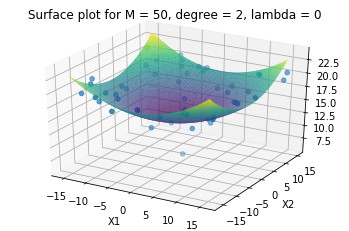

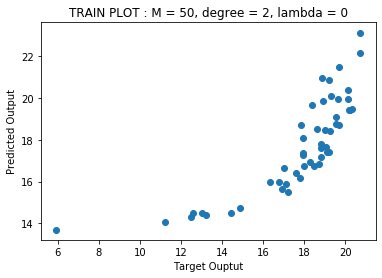

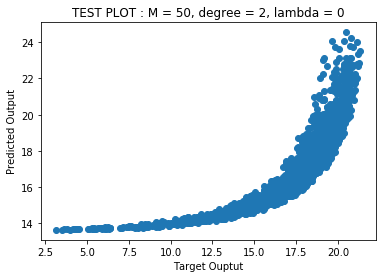

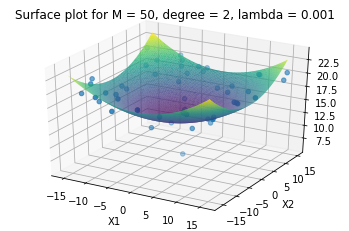

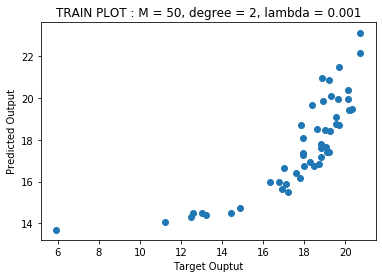

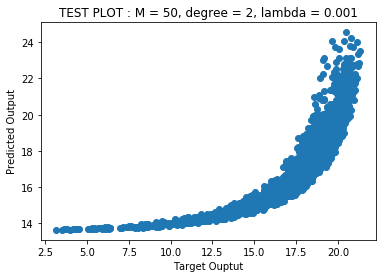

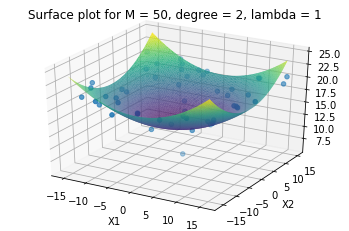

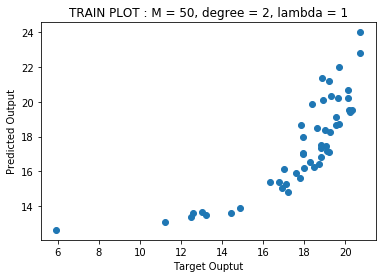

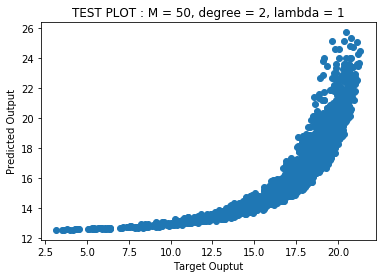

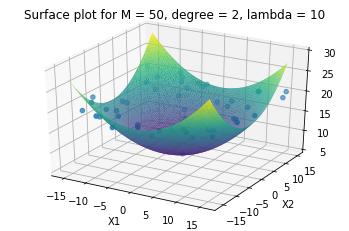

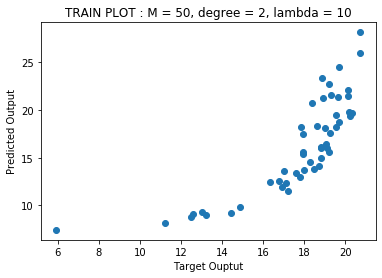

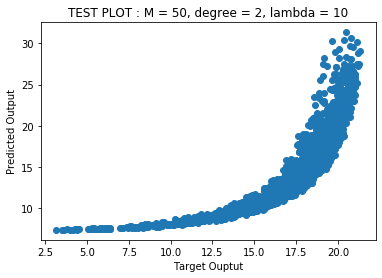

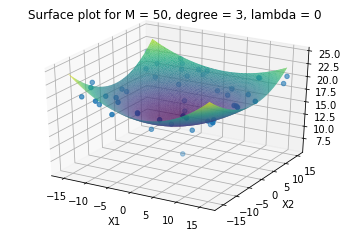

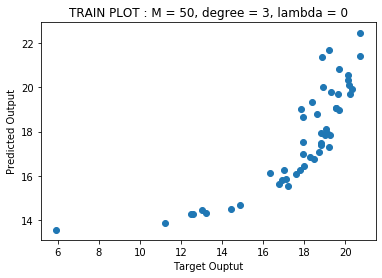

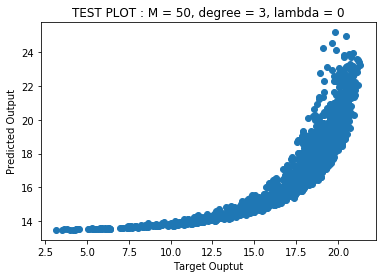

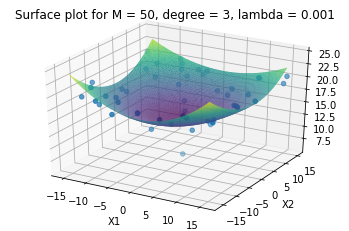

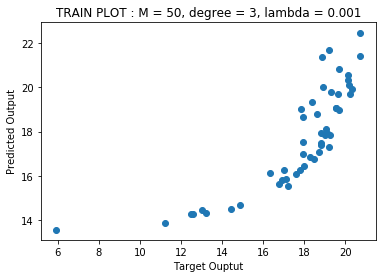

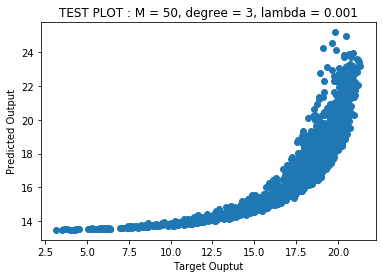

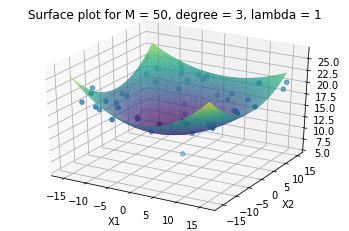

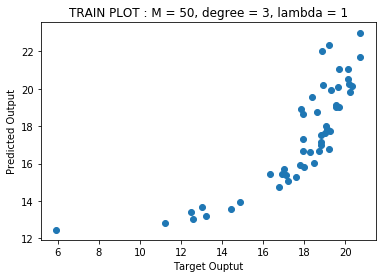

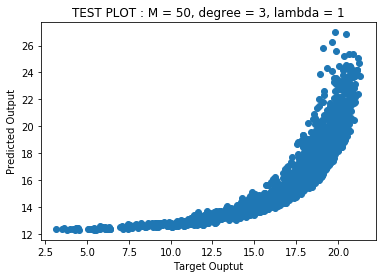

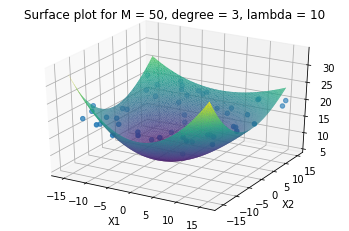

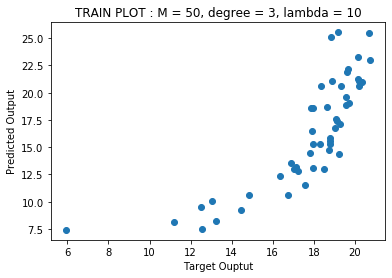

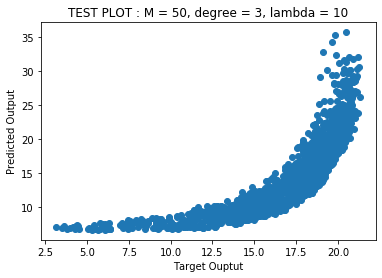

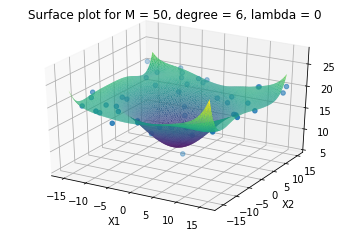

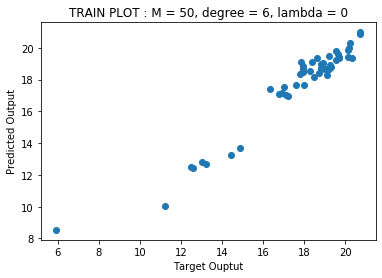

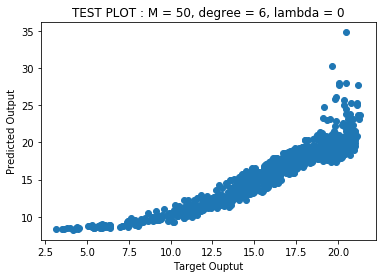

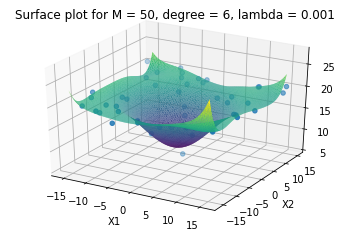

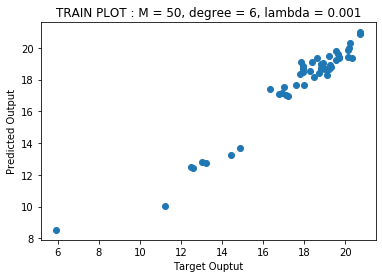

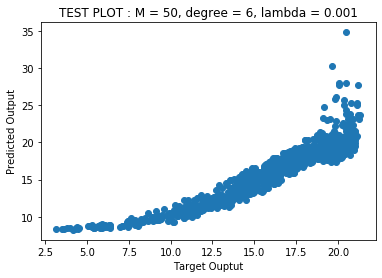

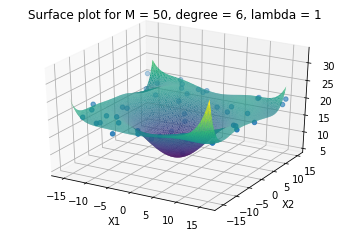

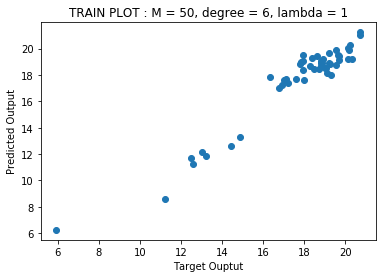

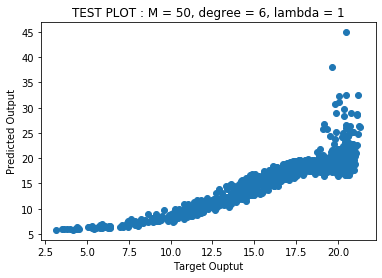

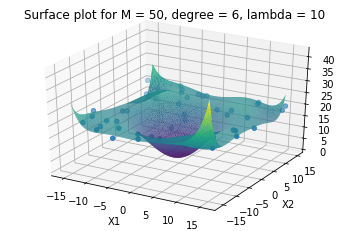

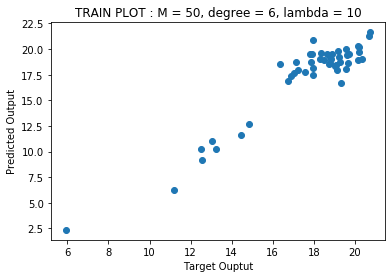

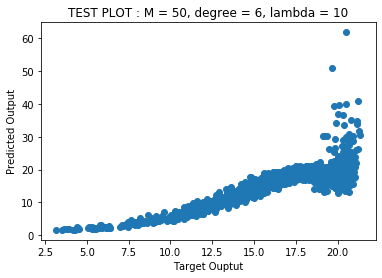

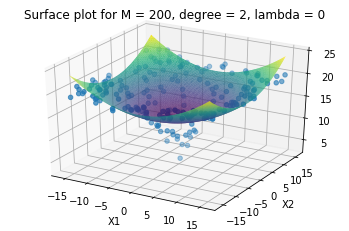

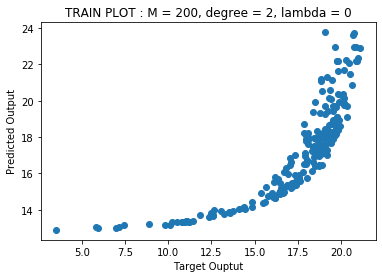

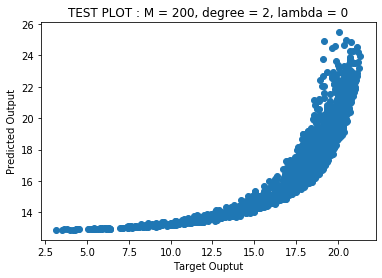

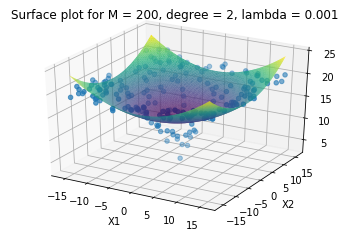

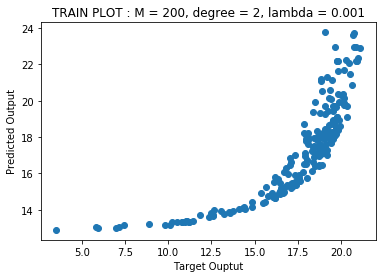

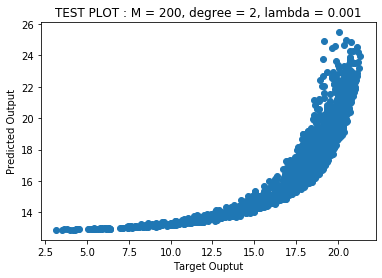

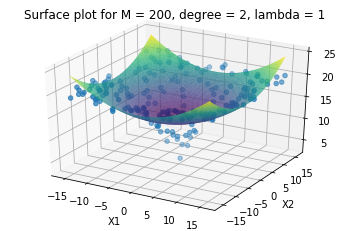

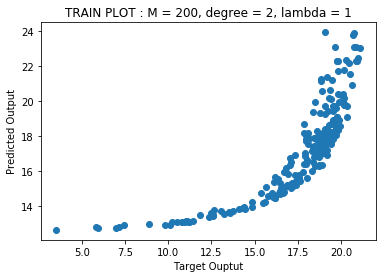

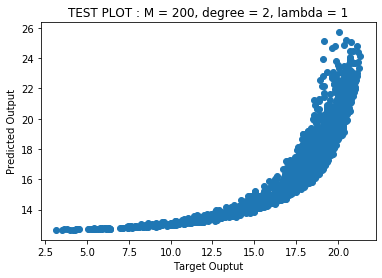

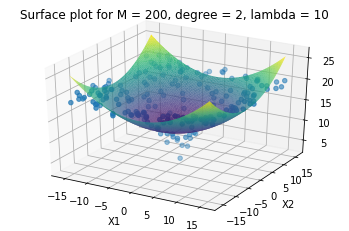

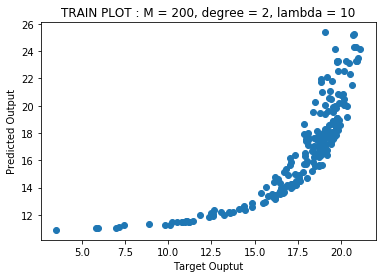

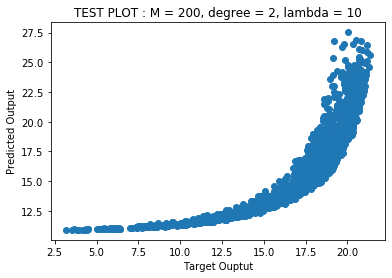

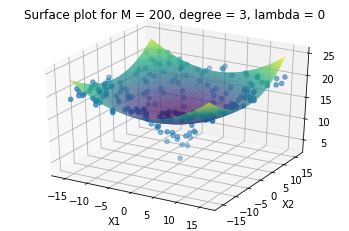

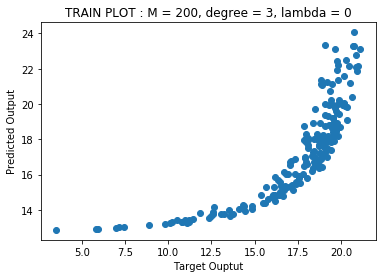

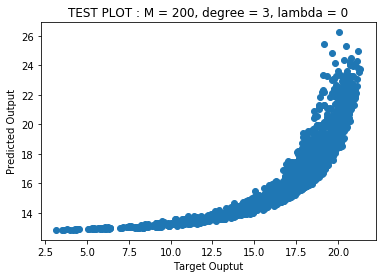

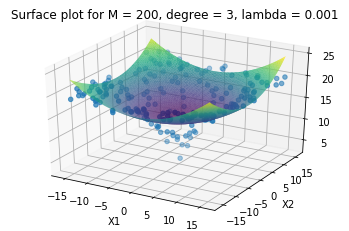

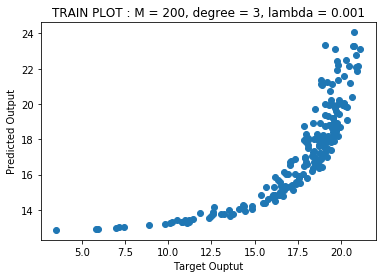

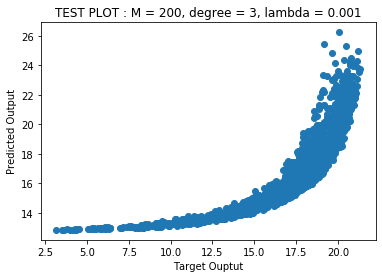

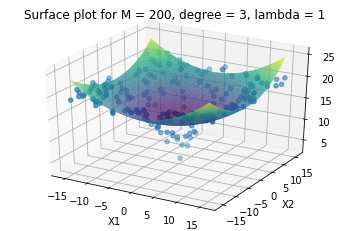

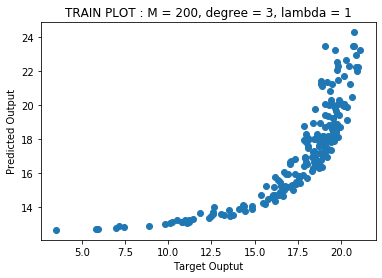

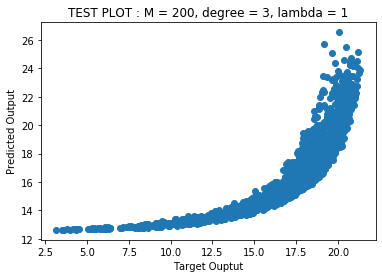

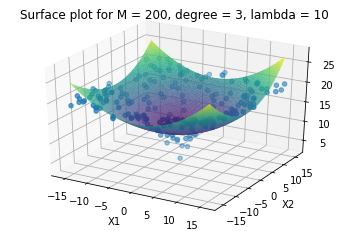

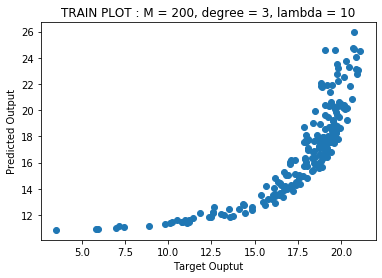

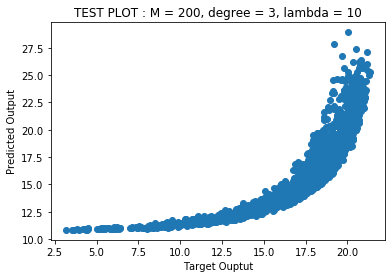

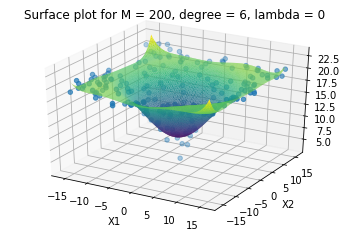

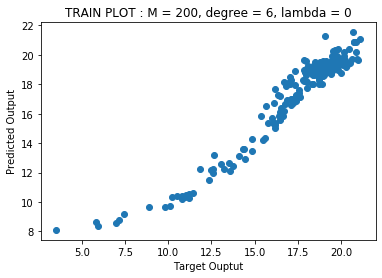

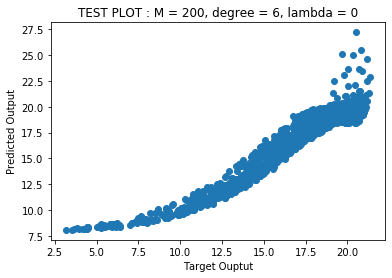

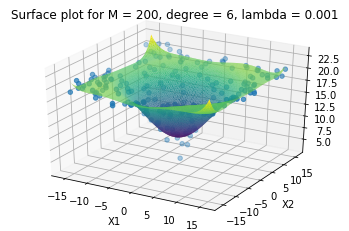

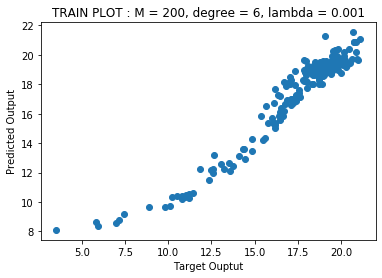

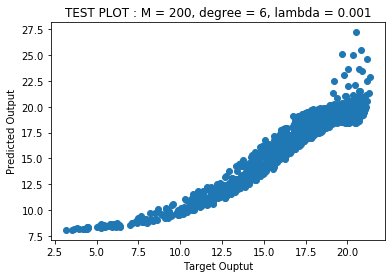

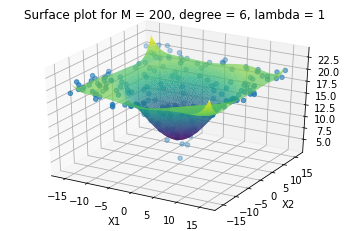

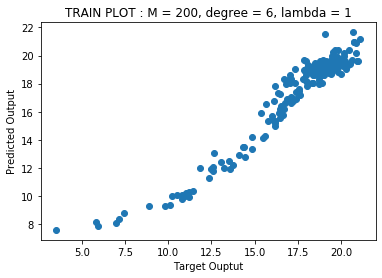

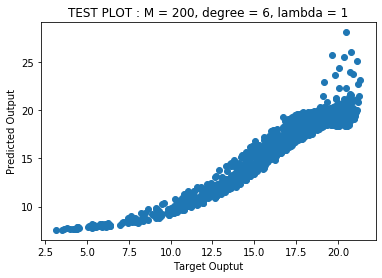

In [ ]:
for num_samples in [50, 200, 500]:
    for deg in [2, 3, 6]:
        for lamb in [0, 10**-3, 1, 10]:
            final_func(train_set, val_set, test_set, num_samples, deg, lamb)

In [ ]:
best_val_rmse = float("inf")
train_rmse_final = None
test_rmse_final = None
best_params = None
for num_samples in [50, 200, 500]:
    for deg in [2, 3, 6]:
        for lamb in [0, 10**-3, 1, 10]:
            train_num_samples = train_set[:num_samples]
            y_train = train_num_samples.y
            x1 = train_num_samples.x1
            x2 = train_num_samples.x2
            w = linear_regress_poly_basis_with_regu(x1,x2,y_train,deg,lamb)
            train_rmse, val_rmse, test_rmse = e_rms(w, train_set, test_set, val_set, deg)
            print("")
            print("Number of Samples = {}, degree = {}, lambda = {}".format(num_samples, deg, lamb))
            print("Train RMSE : {}, Val RMSE : {}, Test RMSE : {}".format(train_rmse, val_rmse, test_rmse))
            print("")
            if(val_rmse < best_val_rmse):
                train_rmse_final = train_rmse
                test_rmse_final = test_rmse
                best_val_rmse = val_rmse
                best_params = [num_samples, deg, lamb]

In [ ]:
best_params

In [ ]:
best_val_rmse

In [ ]:
train_rmse_final

In [ ]:
test_rmse_final